#### Análise de Voos


1.Descobrir a quantiade de atrasos de uma dada companhia passada como parâmetro. 

In [379]:
cia = 'DL'
filteredCarrier = df[(df['UniqueCarrier'] == cia) & (df['DepDelay'] > 0)]
totalDelay = len(filteredCarrier['DepDelay'])

print(f"A quantidade total de atrasos da companhia {cia} é de {totalDelay} vezes")


A quantidade total de atrasos da companhia DL é de 1909 vezes


##### Analisar a frequência de atrasos por companhia pode indicar quais delas têm mais dificuldades em cumprir seus horários. Por exemplo, se uma empresa apresenta um número de atrasos muito maior do que as demais, isso pode sugerir problemas operacionais específicos dessa companhia. No entanto, isso também pode ser causado por outros fatores que devem ser analisados conjuntamente.



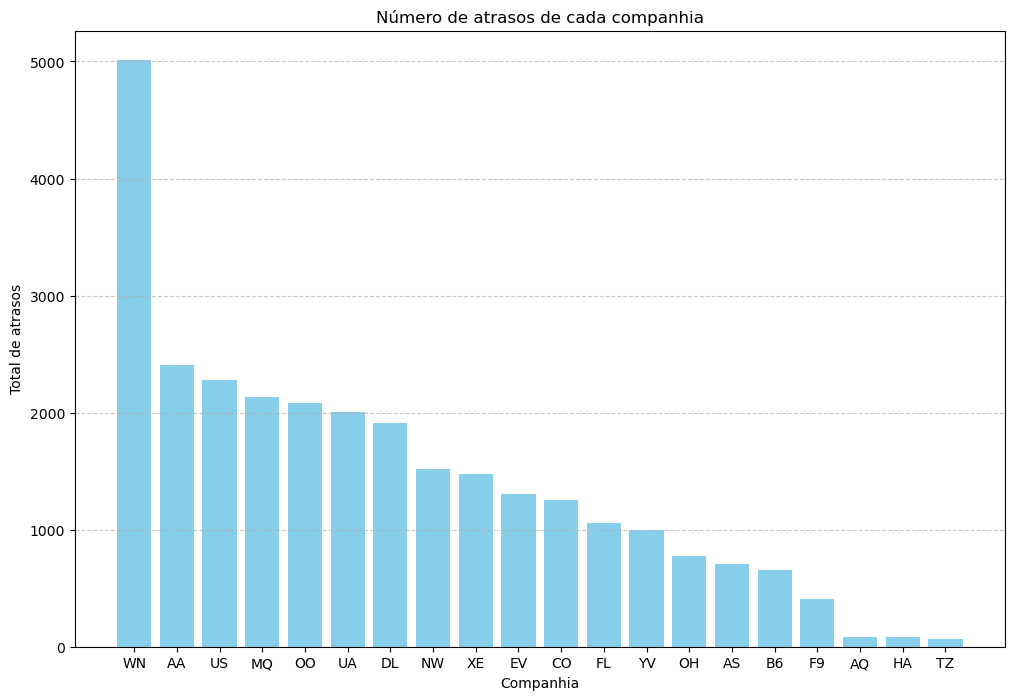

In [381]:
import matplotlib.pyplot as plt
import seaborn as sns
newDf = df[df['DepDelay'] > 0]

totalByCompany = newDf['UniqueCarrier'].value_counts().reset_index()

plt.figure(figsize = (12, 8))

plt.bar(totalByCompany['UniqueCarrier'], totalByCompany['count'], color = 'skyblue')
plt.title('Número de atrasos de cada companhia')
plt.xlabel('Companhia')
plt.ylabel('Total de atrasos')

plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()


##### Existe uma grande disparidade entre o número de atrasos entre os extremos do gráfico. Até mesmo entre as duas companhias com maior número de atrasos é possível perceber uma grande diferença nas quantidades. Isso pode nos dar algumas hipóteses, como a de que a companhia WN realiza muito mais voos que as outras e, por isso, faz sentido que haja mais atrasos, uma vez que o número de viagens é muito maior. Outra hipótese é a de que atrasos nos voos é um problema recorrente na empresa WN, o que é algo ruim para os clientes. No entanto, esses dados não são suficientes tirar conclusões definitivas.

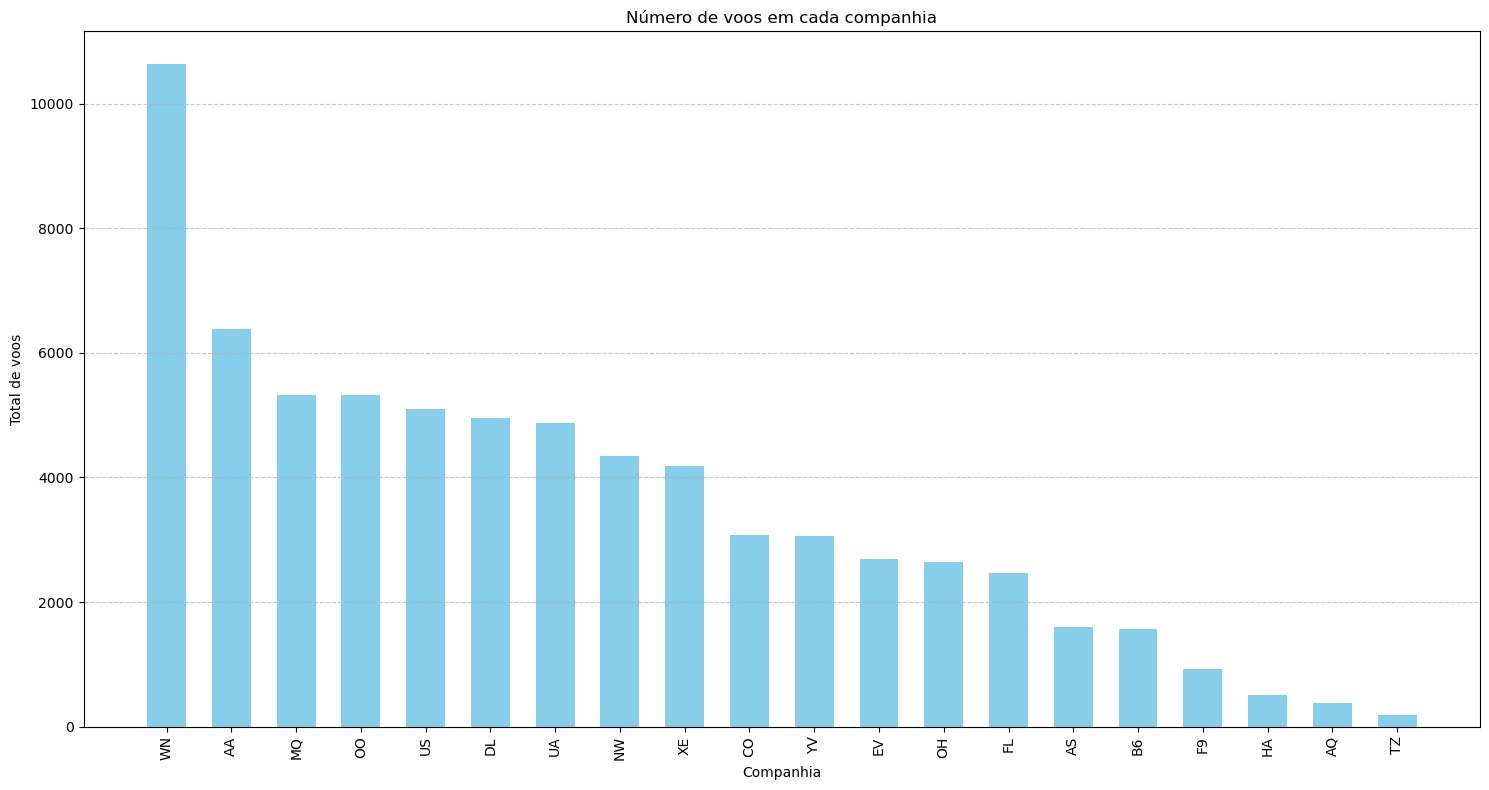

In [383]:
import pandas as pd
import matplotlib.pyplot as plt

newCiaCDf = df[df['DepDelay'].notna()]
totalCia = newAirCDf['UniqueCarrier'].value_counts().reset_index()
totalCia.columns = ['Origin', 'count']



plt.figure(figsize=(15, 8))

bar_width = 0.6  
x = range(len(totalCia))

plt.bar(x, totalCia['count'], color='skyblue', width=bar_width)

plt.xticks(x, totalCia['Origin'], rotation=90)  

plt.title('Número de voos em cada companhia')
plt.xlabel('Companhia')
plt.ylabel('Total de voos')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()

##### Aqui fica visível que a empresa WN realmete realiza mais voos que suas concorrentes, o que pode explicar parcialmente o número maior de atrasos.


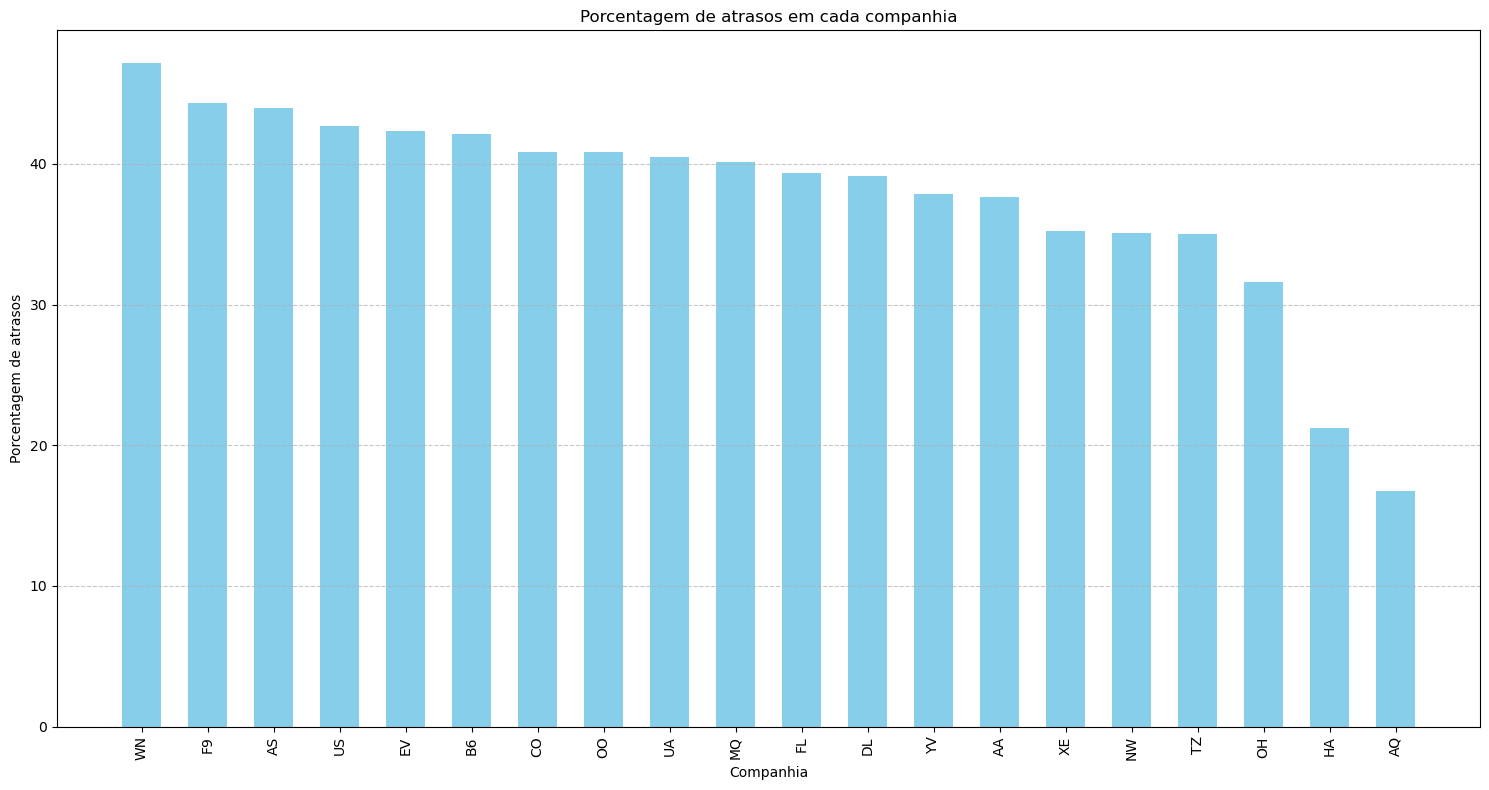

In [509]:
totalByCompany['Percentage'] = (totalByCompany['count']/totalCia['count'])*100
totalByCompany = totalByCompany.sort_values(by = 'Percentage', ascending = False)
plt.figure(figsize=(15, 8))

bar_width = 0.6  
x = range(len(totalByCompany))

plt.bar(x, totalByCompany['Percentage'], color='skyblue', width=bar_width)

plt.xticks(x, totalByCompany['UniqueCarrier'], rotation=90) 

plt.title('Porcentagem de atrasos em cada companhia')
plt.xlabel('Companhia')
plt.ylabel('Porcentagem de atrasos')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()

##### Com o gráfico acima, fica mais fácil de visualizar a relação entre total de atrasos e numero de voos das companhias, especialmente a WN, que apresentava um número de voos atrasados muito maior que as outras. Muito embora ela realmente faça mais voos se comparado as outras companhias, ainda é possível perceber que a porcentagem de atrasos na companhia WN é maior que de suas concorrentes. Isso pode ser provocado, inclusive, pela dificuldade gerada em administrar tantos voos, mas certamente existem outras explicações além dessa.

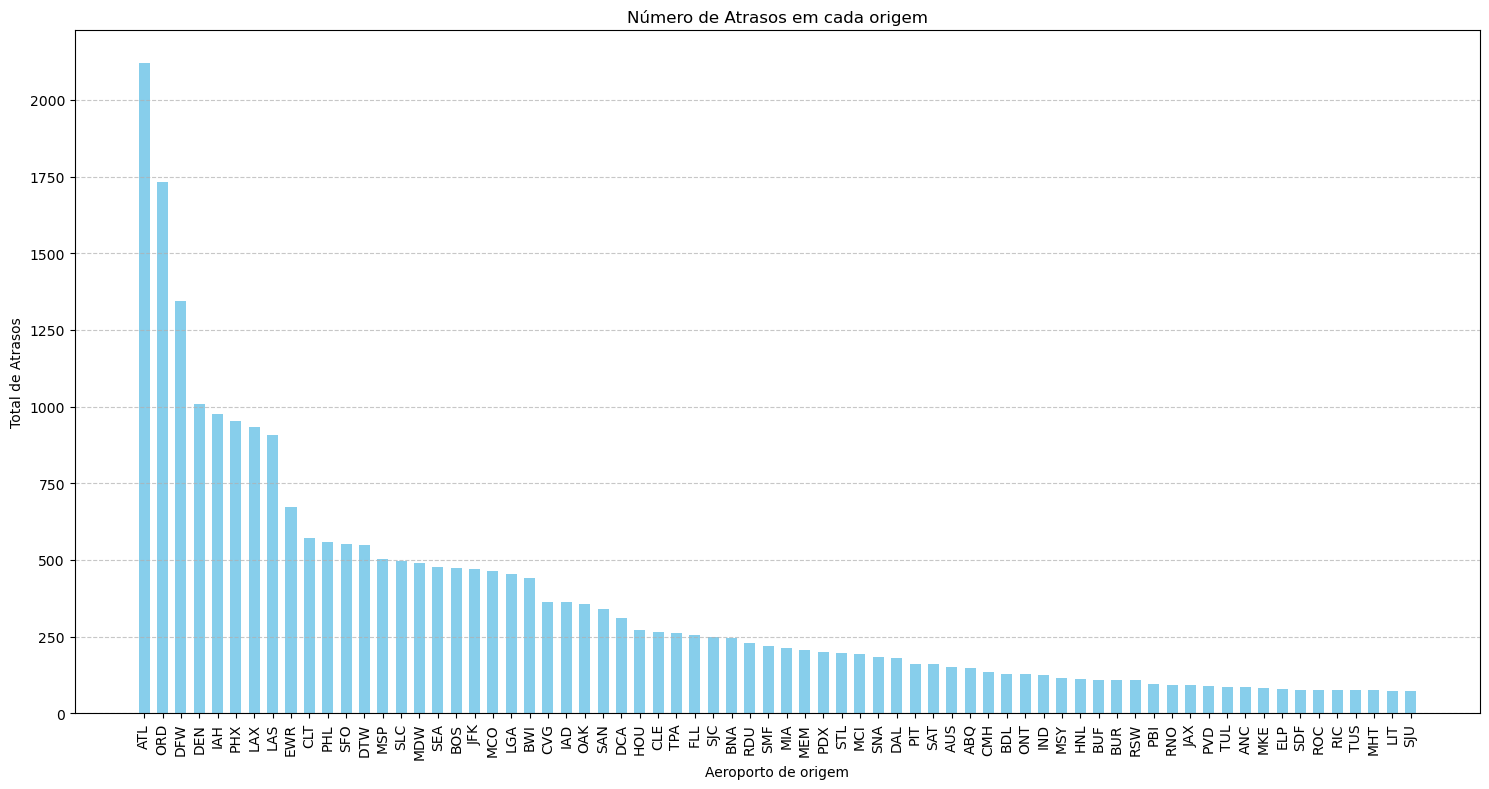

In [512]:

newAirDf = df[df['DepDelay'] > 0]
totalByAir = newAirDf['Origin'].value_counts().reset_index()
totalByAir.columns = ['Origin', 'count']

totalByAir = totalByAir.head(70)

plt.figure(figsize=(15, 8))

bar_width = 0.6 
x = range(len(totalByAir))

plt.bar(x, totalByAir['count'], color='skyblue', width=bar_width)

plt.xticks(x, totalByAir['Origin'], rotation=90)  

plt.title('Número de Atrasos em cada origem')
plt.xlabel('Aeroporto de origem')
plt.ylabel('Total de Atrasos')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()



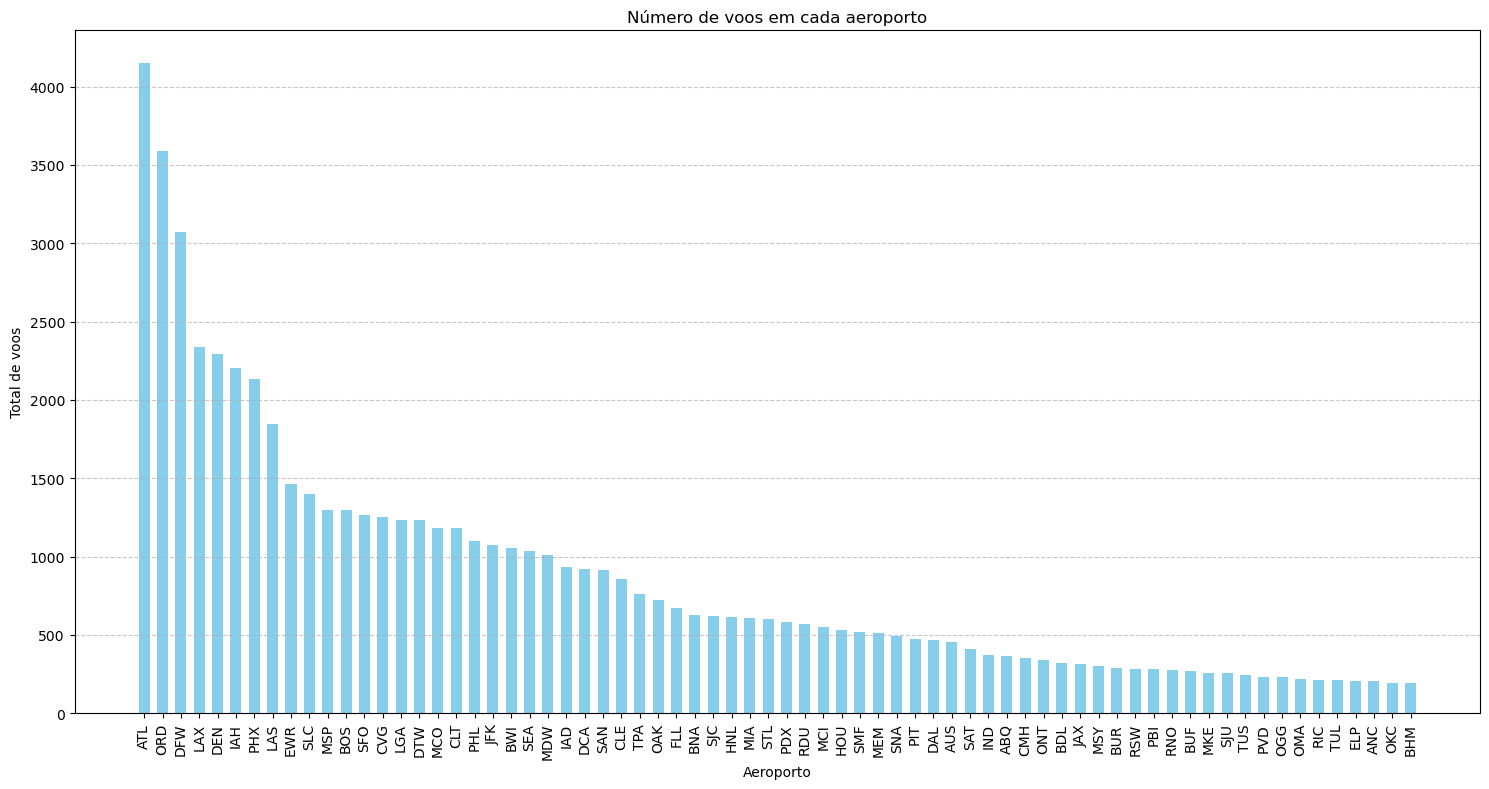

In [393]:

newAirCDf = df[df['DepDelay'].notna()]
totalAir = newAirCDf['Origin'].value_counts().reset_index()
totalAir.columns = ['Origin', 'count']

totalAir = totalAir.head(70)

plt.figure(figsize=(15, 8))

bar_width = 0.6  
x = range(len(totalAir))

plt.bar(x, totalAir['count'], color='skyblue', width=bar_width)

plt.xticks(x, totalAir['Origin'], rotation=90)  

plt.title('Número de voos em cada aeroporto')
plt.xlabel('Aeroporto')
plt.ylabel('Total de voos')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()

##### Quando observamos os gráficos de aeroportos com mais voos e mais atrasos, fica claro que, nesse caso, existe uma correlação entre a quantidade de atrasos e voos, uma vez que os aeroportos com mais voos também são aqueles que apresentam mais atrasos. Contudo, percentualmente falando, os números não são iguais, o que demonstra que o número de atrasos em cada aeroporto também é influenciado por mais de um fator além do número de voos.

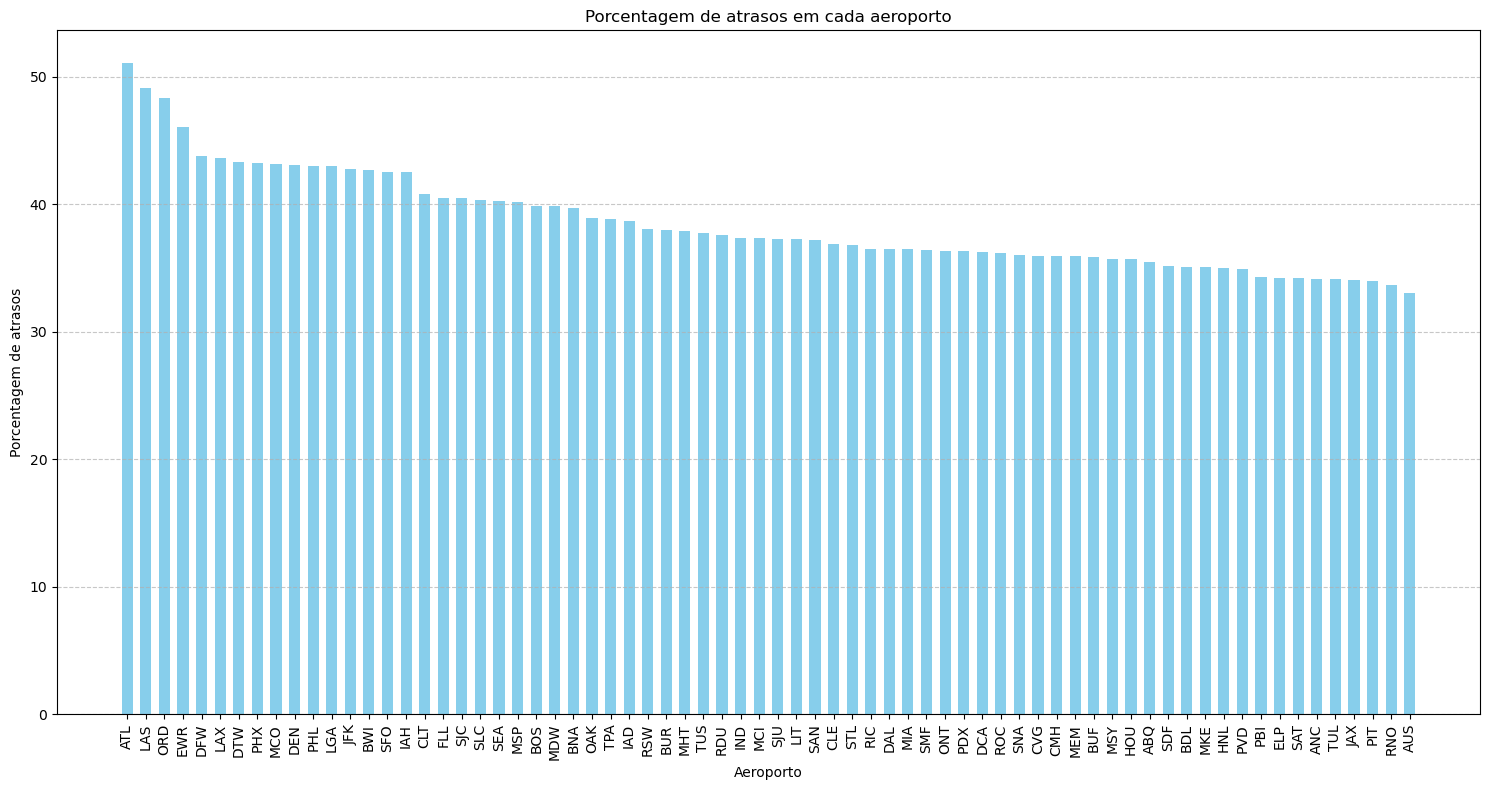

In [514]:
totalByAir['Percentage'] = (totalByAir['count']/totalAir['count'])*100
totalByAir = totalByAir.sort_values(by = 'Percentage', ascending = False)
plt.figure(figsize=(15, 8))

bar_width = 0.6  
x = range(len(totalByAir))

plt.bar(x, totalByAir['Percentage'], color='skyblue', width=bar_width)

plt.xticks(x, totalByAir['Origin'], rotation=90) 

plt.title('Porcentagem de atrasos em cada aeroporto')
plt.xlabel('Aeroporto')
plt.ylabel('Porcentagem de atrasos')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()

##### É possível observar a porcentagem de voos atrasados em 70 aeroportos.
##### Os aeroportos com maiores porcentagens de atraso possuem números por volta de 40%. No entantoos 4 aeroportos com maiores taxas apresentam uma porcentagem mais próxima de metade de seus voos com atraso. Sendo assim, cabe investigar quais outros fatores podem estar influenciando esses resultados, pois diversos fatores podem atrasar a decolagem de um voo. Condições meteorológicas adversas, como tempestades e neblina, podem afetar a visibilidade e a segurança. O congestionamento do tráfego aéreo ou no aeroporto também pode exigir que o voo aguarde sua vez para decolar. Problemas técnicos com a aeronave ou a necessidade de manutenção podem prolongar o tempo de preparação. Questões de segurança, documentação, e procedimentos com carga e passageiros também podem contribuir para atrasos. 

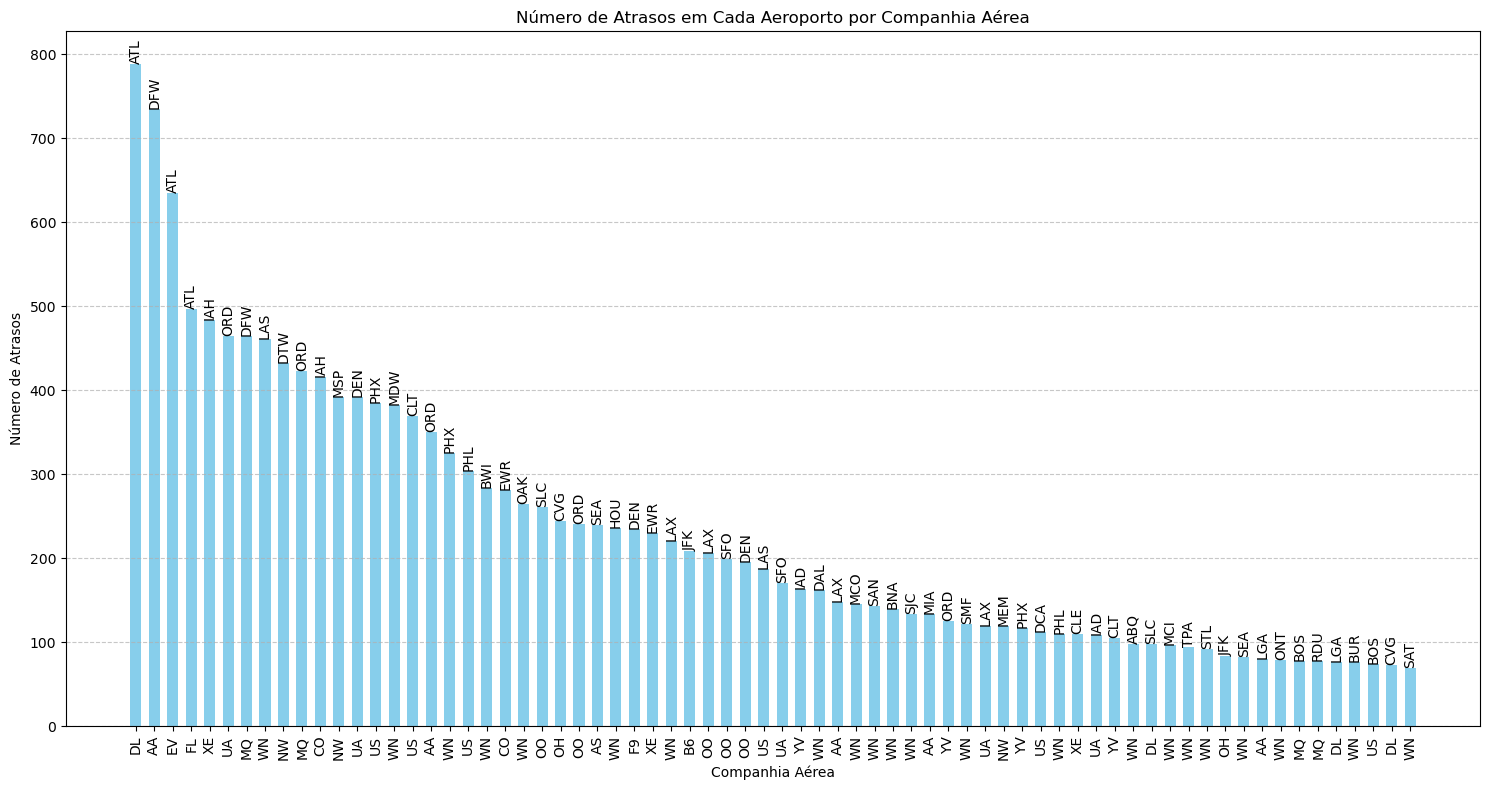

In [516]:
dfAirCia =  newDf.groupby('UniqueCarrier')['Origin'].value_counts().reset_index()
dfAirCia = dfAirCia.sort_values(by = 'count', ascending = False)
dfAirCiaF = dfAirCia.head(70)

plt.figure(figsize=(15, 8))

bar_width = 0.6  
x = range(len(dfAirCiaF))

bars = plt.bar(x, dfAirCiaF['count'], color='skyblue', width=bar_width)

for bar, origin in zip(bars, dfAirCiaF['Origin']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,  
        height,                              
        origin,                              
        ha='center',                        
        va='bottom',                         
        fontsize=10,                          
        rotation=90                         
    )

plt.xticks(x, dfAirCiaF['UniqueCarrier'], rotation=90)  
plt.title('Número de Atrasos em Cada Aeroporto por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Atrasos')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()


##### Os aeroportos DFW e ATL lideram com o maior número de atrasos, seguidos por ORD e IAH. Companhias como AA e DL operam bastante em aeroportos com mais atrasos, especialmente os dois primeiros. A  presença de várias companhias aéreas nos aeroportos mais movimentados sugere que o alto volume de tráfego pode ser uma das causas para os atrasos.
##### A distribuição dos atrasos diminui gradualmente após os primeiros aeroportos listados. Isso sugere uma concentração dos problemas em um número relativamente pequeno de aeroportos, com uma longa cauda de aeroportos com menos atrasos.
##### Alguns aeroportos aparecem mais de uma vez na lista, indicando que várias companhias aéreas operam neles aeroportos, contribuindo coletivamente para o número total de atrasos. Por exemplo, ATL e DFW aparecem em diferentes pontos do gráfico, associados a diferentes companhias aéreas.
##### Os atrasos nos aeroportos maiores e mais movimentados, como DFW e ATL, são significativos e provavelmente têm um impacto considerável no desempenho operacional das companhias aéreas.

##### O aeroporto ATL (considerado o mais movimentado do mundo) lidera com o maior número de atrasos, seguido por ORD e DFW. Esses aeroportos são grandes hubs nos Estados Unidos, o que explica o volume elevado de atrasos, uma vez que concentram um grande número de voos.
##### Cruzando os dados entre todos os gráficos, podemos concluir que aeroportos que operam com um número elevado de voos frequentemente têm não apenas mais atrasos em números absolutos, mas também uma porcentagem relativamente alta de atrasos. Isso pode indicar que o volume excessivo de operações está relacionado diretamente ao número de atrasos, e que esses aeroportos enfrentam desafios significativos na gestão eficiente do tráfego aéreo. Outra observação é que alguns aeroportos com menos voos também apresentam altas porcentagens de atrasos, o que pode ser indicativo de outros fatores, como condições meteorológicas desfavoráveis ou problemas de infraestrutura específicos.

2. Descobrir o vôo com maior atraso na chegada (`ArrDelay`) registrado.


In [412]:

mostLate = df[df['ArrDelay'] == df['ArrDelay'].max()]
mostLate[['UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'ArrDelay']]



,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
433,B6,740,PSE,JFK,822.0


3. Descobrir o vôo com maior atraso na saída (`DepDelay`) registrado.


In [423]:
mostLateDep = df[df['DepDelay'] == df['DepDelay'].max()]
mostLateDep [['UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'DepDelay']]

,UniqueCarrier,FlightNum,Origin,Dest,DepDelay
433,B6,740,PSE,JFK,792.0


##### O aeroporto de origem do voo foi o Aeroporto de Ponce, conhecido oficialmente como Aeroporto Mercedita, localizado na cidade de Ponce, em Porto Rico. O voo foi atendido pela companhia aérea B6, que tem a quinta maior taxa de atrasos por total de voos em nossos dados. O destino do voo foi Nova York, no aeroporto John F. Kennedy. A rota entre Porto Rico e o Aeroporto JFK, em Nova York, frequentemente enfrenta atrasos devido a vários fatores. Condições meteorológicas adversas, tanto em Nova York quanto em Porto Rico, são uma das principais causas. A alta demanda por essa rota também pode contribuir para congestionamentos e atrasos. Além disso, problemas operacionais, como manutenção de aeronaves e questões de controle de tráfego aéreo em Nova York, um dos espaços aéreos mais movimentados do mundo, podem afetar a pontualidade dos voos.

4. Descobrir o vôo mais longo.


In [426]:
longest = df[df['Distance'] == df['Distance'].max()]
longest[['UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']]

,UniqueCarrier,FlightNum,Origin,Dest,Distance
7129,DL,317,ATL,HNL,4502
8717,DL,1282,HNL,ATL,4502
17235,DL,1282,HNL,ATL,4502
51741,DL,855,ATL,HNL,4502


##### A rota da Delta Air Lines (DL317) conecta o Aeroporto Internacional de Atlanta (ATL) ao Aeroporto Internacional de Honolulu (HNL) no Havaí, cobrindo uma distância de 4.502 milhas. Este voo, um dos mais longos em território doméstico dos EUA, dura cerca de 9 a 10 horas. 

5. Contar quantos vôos precisaram ser redirecionados (`Diverted`).


In [429]:
dfDiverted = df[(df['Diverted'] > 0) & (df['Diverted'].notna())]
totalDiverted = dfDiverted['Diverted'].sum()

print(f"O total de voos rediredirecionados foi de {totalDiverted}")


O total de voos rediredirecionados foi de 133


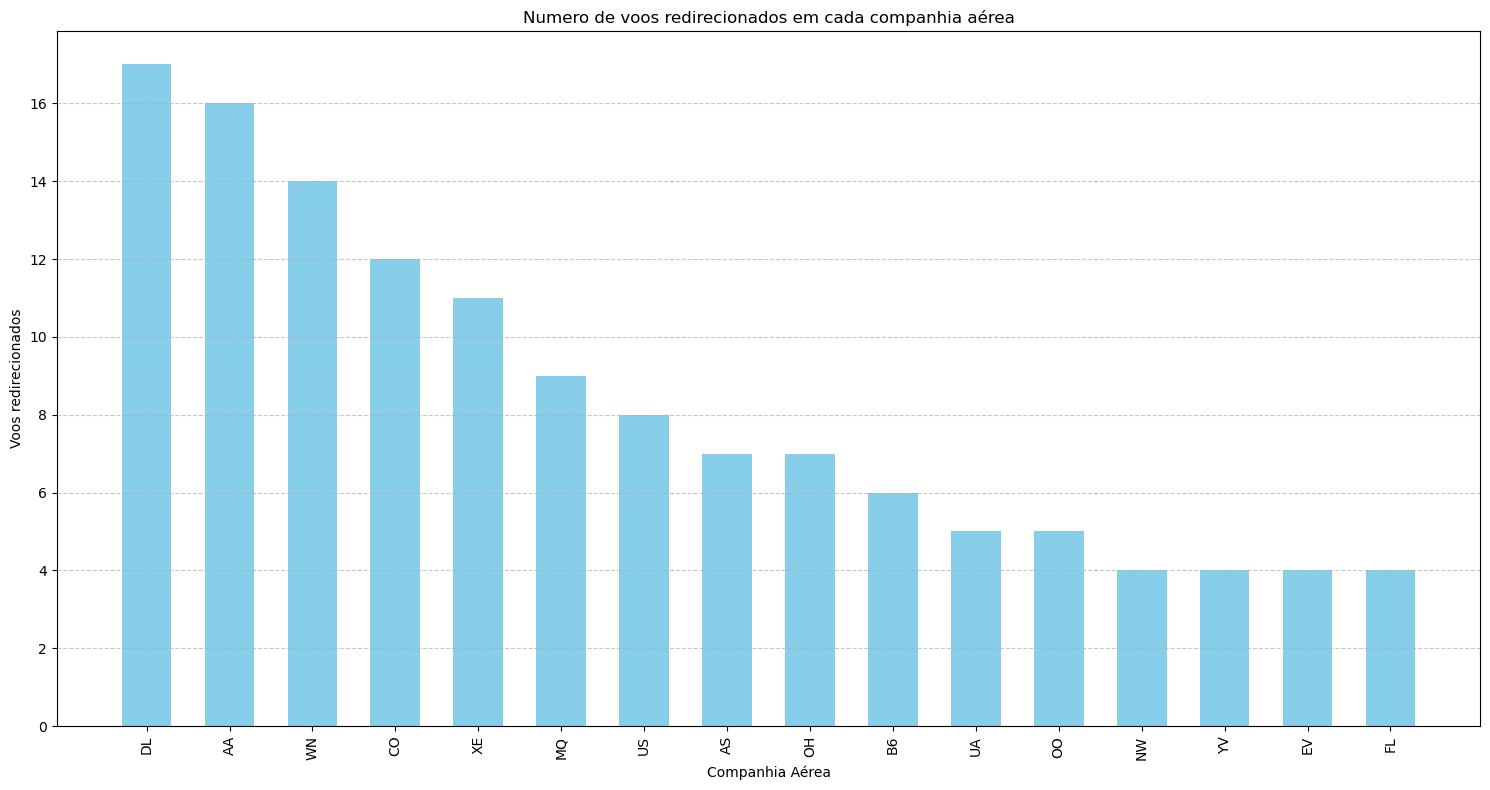

In [434]:
dfDivertedCia = dfDiverted['UniqueCarrier'].value_counts().reset_index()

plt.figure(figsize = (15,8))
bar_width = 0.6

x = range(len(dfDivertedCia))
plt.bar(x, dfDivertedCia['count'], color = 'skyblue', width = bar_width)

plt.xticks(x, dfDivertedCia['UniqueCarrier'], rotation=90) 

plt.title('Numero de voos redirecionados em cada companhia aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Voos redirecionados')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Companhias como DL, AA e WN têm mais voos redirecionados devido ao alto volume de operações, rotas que passam por áreas com condições meteorológicas adversas e a operação em grandes hubs com tráfego aéreo intenso. Além disso, fatores como problemas operacionais e a necessidade de garantir segurança contribuem para esses redirecionamentos. Essas companhias lidam com frequentes desafios logísticos, o que aumenta a probabilidade de desviar voos para aeroportos alternativos.

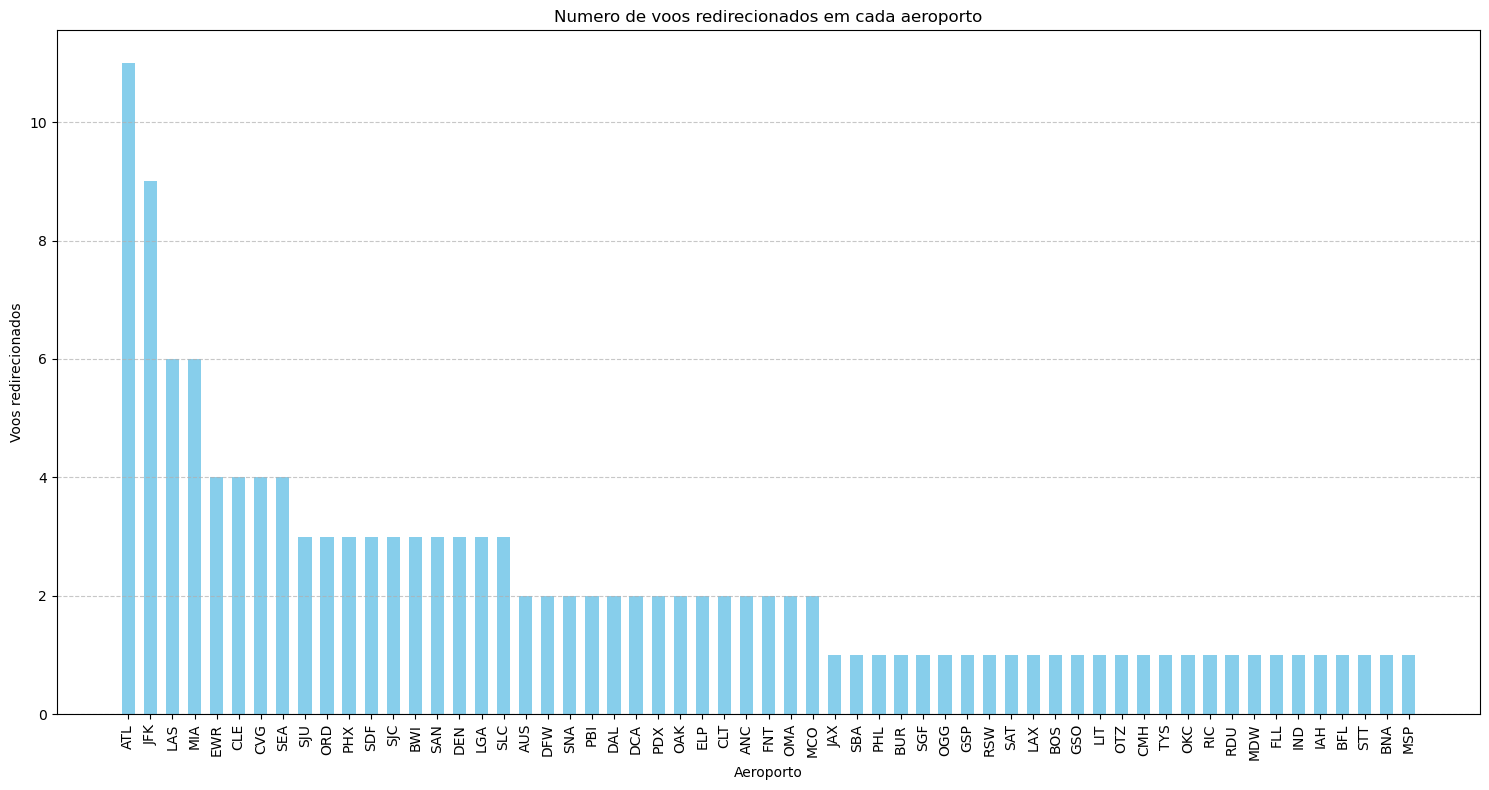

In [438]:
dfDivertedAir = dfDiverted['Origin'].value_counts().reset_index()

plt.figure(figsize = (15,8))
bar_width = 0.6

x = range(len(dfDivertedAir))
plt.bar(x, dfDivertedAir['count'], color = 'skyblue', width = bar_width)

plt.xticks(x, dfDivertedAir['Origin'], rotation=90) 

plt.title('Numero de voos redirecionados em cada aeroporto')
plt.xlabel('Aeroporto')
plt.ylabel('Voos redirecionados')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Aeroportos como ATL e JFK em Nova York apresentam mais redirecionamentos devido ao alto volume de tráfego aéreo e a intensa movimentação de voos. Grandes hubs como LAS (Las Vegas), MIA (Miami), e ORD (Chicago) também têm números elevados de redirecionamentos, frequentemente devido a congestionamento e condições meteorológicas adversas. Aeroportos com grandes volumes de operações e conexões internacionais, enfrentam desafios semelhantes, aumentando a probabilidade de redirecionamentos para garantir a eficiência e segurança do tráfego aéreo.

6. Calcular o tempo de atraso total para a companhia `Delta Air Lines`.

In [82]:
filteredCodes = df[df['UniqueCarrier'] == 'DL']

filteredArrCodes = filteredCodes[(filteredCodes['ArrDelay'].notna()) & (filteredCodes['ArrDelay'] > 0)]

dfArr = filteredArrCodes[['ArrDelay']].copy()
dfArr = dfArr.rename(columns={'ArrDelay': 'Delay'})

dfArr.to_csv('infile.csv', index=False, header=False)

In [84]:
!paste -sd+ infile.csv | bc

63427.0


##### O tempo total de atraso anual da Delta Air Lines é impactado por vários fatores, incluindo o alto volume de voos, condições meteorológicas adversas, problemas operacionais, congestionamento de tráfego aéreo em grandes hubs, e procedimentos de segurança. A combinação desses fatores contribui para o aumento dos atrasos, refletindo a necessidade contínua de melhorias operacionais e investimentos em tecnologia para otimizar a pontualidade e eficiência da companhia.

7. Mostrar o tempo total de atrasos para a decolagem de vôos no aeroporto `JFK`, de Nova Iorque.

In [54]:
dfJFK = df[(df['DepDelay'] > 0) &(df['Origin'] == 'JFK') & (df['DepDelay'].notna())]
jfkTotal = dfJFK['DepDelay'].sum() 


print(f"O tempo total de atrasos para a decolagem no aeroporto JFK foi de {jfkTotal} minutos.")

O tempo total de atrasos para a decolagem no aeroporto JFK foi de 16065.0 minutos.


##### O tempo total de atraso de decolagem no Aeroporto JFK é impactado por fatores como o alto volume de tráfego aéreo, condições meteorológicas adversas e congestionamento. Como um dos aeroportos mais movimentados do mundo, JFK enfrenta desafios significativos que contribuem para atrasos acumulados na decolagem, refletindo a necessidade de melhorias na gestão do tráfego aéreo e infraestrutura.

#### Gerando tabela de condições climáticas

In [93]:
import random
import numpy as np
from datetime import datetime, timedelta

dateRange = pd.date_range(start=datetime(2006, 1, 1), end=datetime(2006, 12, 31), freq='D')

weatherData = {
    "Data" : dateRange,
    "Tempestade" : [random.choice([0,1]) for _ in range (len(dateRange))],
    "Visibilidade" : [random.uniform(0.5, 10) for _ in range (len(dateRange))],
    "Vento" : [random.uniform(20,120) for _ in range (len(dateRange))]
}

weatherDf = pd.DataFrame(weatherData)
weatherDf.to_csv('weatherData.csv', index = False) 

In [554]:
import pandas as pd

weatherDf['Data'] = pd.to_datetime(weatherDf['Data'])

df['Data'] = pd.to_datetime(df[['Year', 'Month', 'DayofMonth']].apply(lambda x: f"{x['Year']}-{int(x['Month']):02d}-{int(x['DayofMonth']):02d}", axis=1))

df.reset_index(drop=True, inplace=True)
weatherDf.reset_index(drop=True, inplace=True)

dfMerged = pd.merge(df, weatherDf, on='Data', how='left')


#### Análise de tendências temporais

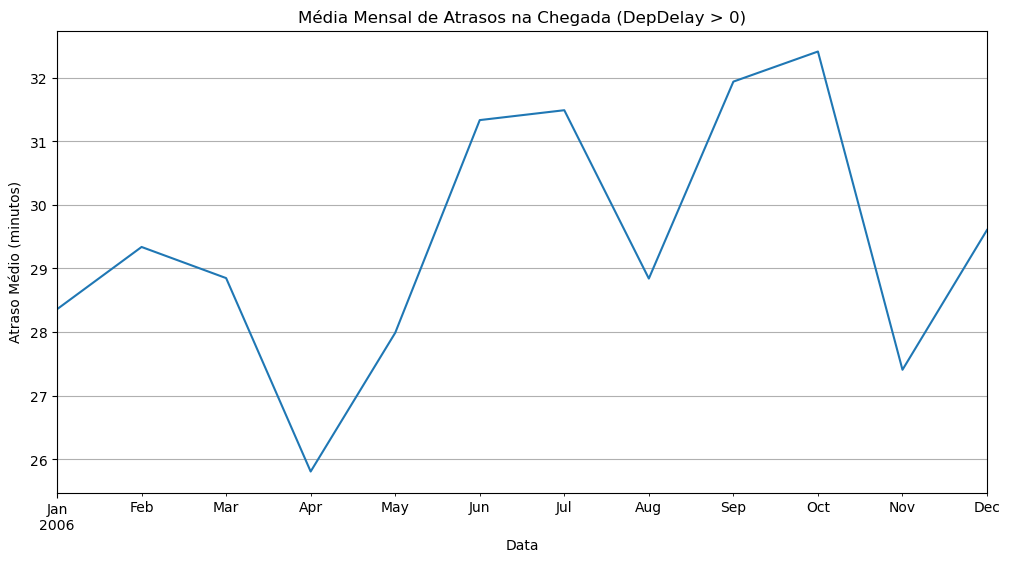

In [556]:
import matplotlib.pyplot as plt

dfMerged.set_index('Data', inplace=True)

dfFiltered = dfMerged[dfMerged['DepDelay'] > 0]

if 'ArrDelay' in dfFiltered.columns:
    plt.figure(figsize=(12, 6))
    dfFiltered['ArrDelay'].resample('ME').mean().plot()
    plt.title('Média Mensal de Atrasos na Chegada (DepDelay > 0)')
    plt.xlabel('Data')
    plt.ylabel('Atraso Médio (minutos)')
    plt.grid(True)
    plt.show()


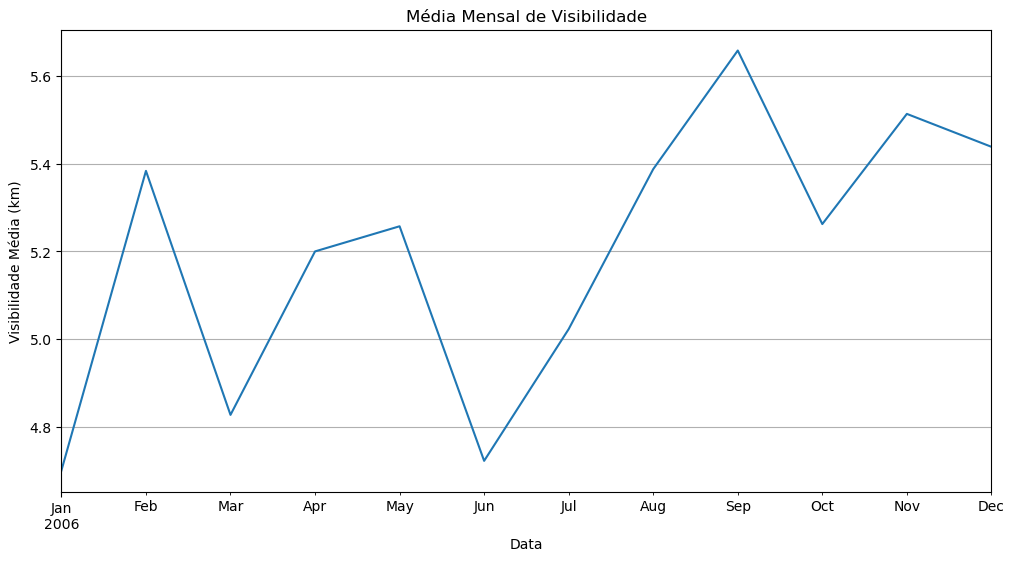

In [546]:
import matplotlib.pyplot as plt

if 'Visibilidade' in dfMerged.columns:
    dfMerged.set_index('Data', inplace=True)
    
    dfMerged.index = pd.to_datetime(dfMerged.index)
    
    plt.figure(figsize=(12, 6))
    dfMerged['Visibilidade'].resample('ME').mean().plot()
    plt.title('Média Mensal de Visibilidade')
    plt.xlabel('Data')
    plt.ylabel('Visibilidade Média (km)')
    plt.grid(True)
    plt.show()


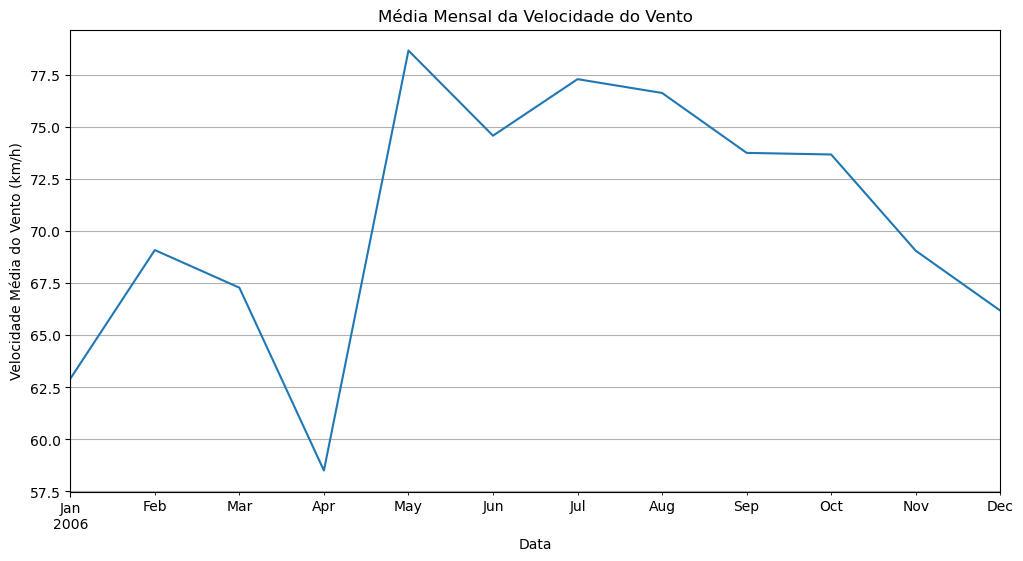

In [470]:
if 'Vento' in dfMerged.columns:
    plt.figure(figsize=(12, 6))
    dfMerged['Vento'].resample('ME').mean().plot()
    plt.title('Média Mensal da Velocidade do Vento')
    plt.xlabel('Data')
    plt.ylabel('Velocidade Média do Vento (km/h)')
    plt.grid(True)
    plt.show()

##### A análise dos dados revela padrões importantes sobre o impacto das condições meteorológicas nos atrasos dos voos ao longo do ano. Há uma variação significativa nos atrasos de voos ao longo do ano. Observou-se que os meses com maior incidência de atrasos são outubro, setembro, julho e junho. Esses meses parecem coincidir com condições meteorológicas que podem contribuir para os atrasos, embora a análise mais detalhada das condições específicas de cada mês seja necessária para entender melhor essas correlações.

##### Além disso, os meses com ventos mais fortes, como maio, julho, agosto e junho, mostram uma tendência clara de que ventos intensos podem estar associados a um aumento nos atrasos. O impacto dos ventos fortes nos voos é significativo, pois pode afetar o tempo de viagem e a segurança, resultando em atrasos adicionais.

##### Por outro lado, os meses com menores visibilidades são janeiro, junho e março. A baixa visibilidade nesses períodos pode ser um fator determinante nos atrasos dos voos, pois condições de visibilidade reduzida podem exigir ajustes operacionais que contribuem para atrasos.

##### Em resumo, a análise sugere que tanto as condições de vento quanto a visibilidade têm um impacto considerável nos atrasos dos voos. Os meses com maiores atrasos frequentemente coincidem com aqueles que apresentam condições meteorológicas adversas, como ventos fortes e visibilidade reduzida. Esses dados podem ajudar na compreensão das causas dos atrasos e na implementação de medidas para mitigar os impactos das condições meteorológicas sobre a pontualidade dos voos.

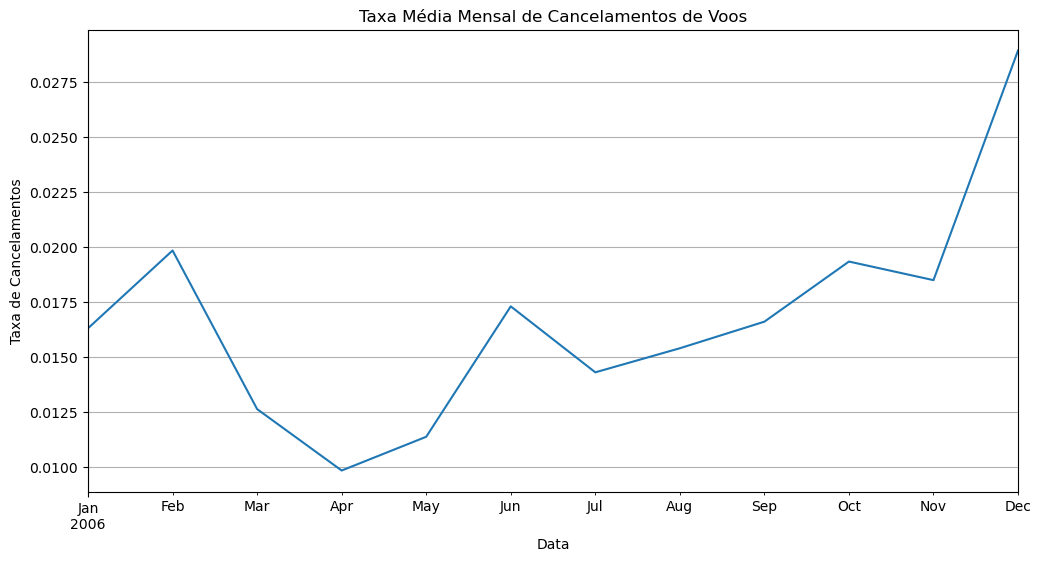

In [495]:
import matplotlib.pyplot as plt


cancelledCount = dfMerged['Cancelled'].resample('ME').sum()
totalFlights = dfMerged.resample('ME').size()
    
cancellationRate = cancelledCount / totalFlights
    
plt.figure(figsize=(12, 6))
cancellationRate.plot()
plt.title('Taxa Média Mensal de Cancelamentos de Voos')
plt.xlabel('Data')
plt.ylabel('Taxa de Cancelamentos')
plt.grid(True)
plt.show()



##### A análise das taxas de cancelamento de voos revela que dezembro e fevereiro são os meses com as maiores taxas de cancelamentos. Este fenômeno pode ser atribuído a condições climáticas adversas frequentemente associadas a esses meses, especialmente no hemisfério norte. Durante o inverno, as condições meteorológicas podem ser mais severas, resultando em um aumento significativo nos cancelamentos de voos.
##### Em contraste, meses com condições climáticas mais estáveis, como durante a primavera e o verão, apresentam taxas de cancelamentos significativamente menores. Esses períodos costumam ter menos tempestades e ventos mais suaves, o que melhora a visibilidade e reduz os riscos associados ao voo, resultando em uma menor necessidade de cancelamentos.

#### Impacto das condições metereológicas 

##### A análise dos dados revela que os meses com mais atrasos foram outubro, setembro, julho e junho. Esses meses coincidem com o início e o meio do verão, que é uma época de alta atividade para a aviação. O aumento dos atrasos pode ser atribuído a vários fatores, incluindo o volume elevado de voos durante os meses de pico e as condições meteorológicas variáveis que ocorrem frequentemente nessa época do ano. Por exemplo, julho e junho, que estão no auge do verão, podem experimentar condições climáticas instáveis, como tempestades isoladas, que podem contribuir para os atrasos. Outubro e setembro, embora ainda no verão, podem enfrentar mudanças sazonais que introduzem variabilidades climáticas que também impactam a pontualidade dos voos.

##### Os meses com ventos mais fortes foram maio, julho, agosto e junho. Ventos intensos podem causar uma série de problemas para a aviação, incluindo desafios durante a decolagem e o pouso, o que pode resultar em atrasos e até mesmo cancelamentos. A ocorrência de ventos fortes em maio, julho e junho sugere que essas condições meteorológicas adversas têm um impacto significativo nas operações de voo. Agosto também se destaca como um mês com ventos fortes, possivelmente associados às condições meteorológicas variadas que ocorrem no final do verão.
##### Quanto à visibilidade, os meses com menor visibilidade foram janeiro, junho e março. Janeiro e março, que correspondem ao inverno e à primavera, podem experimentar visibilidade reduzida devido a nevoeiros e tempestades. Junho, embora no início do verão, também pode apresentar episódios de baixa visibilidade devido às condições climáticas variáveis típicas dessa transição de estação. A baixa visibilidade reduz a capacidade dos pilotos de operar com segurança, o que pode contribuir para atrasos e cancelamentos de voos.

##### Quando relacionamos essas variáveis, observamos que os meses com alta taxa de atrasos frequentemente coincidem com períodos de ventos fortes e baixa visibilidade. Por exemplo, junho, que apresenta ventos fortes e baixa visibilidade, é também um dos meses com mais atrasos. Setembro e outubro, que têm alta taxa de atrasos, podem ser impactados por condições climáticas instáveis e mudanças sazonais. A combinação de ventos fortes e baixa visibilidade durante determinados meses sugere uma forte interação entre as condições meteorológicas adversas e o aumento dos atrasos, indicando a necessidade de melhor gestão das operações de voo para minimizar o impacto dessas condições.

#### Análise da eficiência operacional

##### Os dados indicam que aeroportos como ATL, ORD, e DFW apresentam altas taxas de atrasos, com ATL liderando com mais de 51% dos voos atrasados. Esse dado é preocupante, pois ATL é um dos hubs mais movimentados dos Estados Unidos, e uma alta taxa de atrasos pode indicar desafios operacionais significativos, possivelmente exacerbados por condições climáticas adversas, como ventos fortes e baixa visibilidade, que já foram observados em meses com grande volume de atrasos, como junho e julho. A presença de ventos fortes e baixa visibilidade pode impactar a eficiência das operações, contribuindo para a alta taxa de atrasos observada.

##### Ao cruzar as informações de atrasos por companhia aérea, a WN se destaca com a maior porcentagem de atrasos, 47,14%, sugerindo que, embora seja uma das maiores operadoras, enfrenta desafios operacionais significativos em manter seus voos dentro do cronograma. Fatores como a alta frequência de operações em aeroportos com condições meteorológicas adversas podem explicar parte dessa ineficiência. 

##### Além disso, companhias como DL e AA, que também operam intensamente em hubs como ATL e DFW, apresentam números elevados de atrasos, indicando que as condições meteorológicas adversas e a alta demanda durante os meses de verão afetam significativamente suas operações. Essas companhias enfrentam o desafio adicional de operar em aeroportos com alta porcentagem de atrasos, o que pode ser reflexo das mesmas condições climáticas mencionadas anteriormente. Isso sugere uma necessidade crítica de aprimorar a gestão das operações durante esses períodos e talvez reavaliar a alocação de recursos em meses particularmente desafiadores.

##### Em suma, a eficiência operacional das companhias aéreas é fortemente impactada tanto pelas condições meteorológicas sazonais quanto pela infraestrutura dos aeroportos. A concentração de atrasos em determinados meses e a correlação com ventos fortes e baixa visibilidade apontam para a necessidade de um planejamento mais robusto e adaptável, especialmente em aeroportos críticos como ATL e ORD, para mitigar os impactos das condições adversas e melhorar a pontualidade e confiabilidade das operações aéreas.